# Worksheet 07

Name:  Dayu Li
UID: U61453443

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

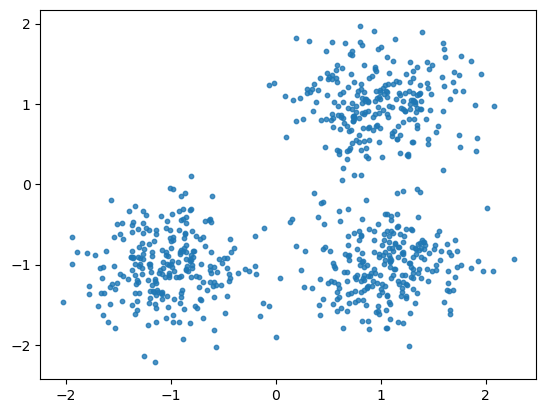

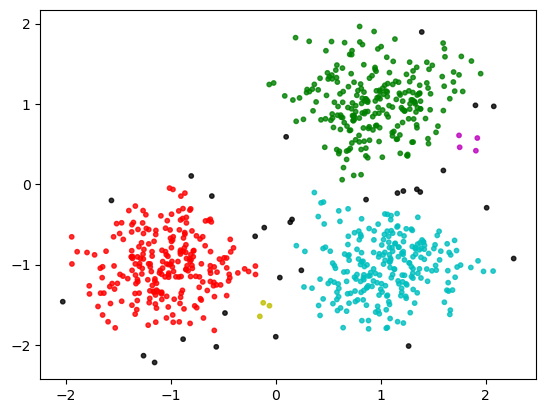

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def region_query(self, point):
        neighbors = []
        for i in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[i] - point) <= self.epsilon:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, point_idx, neighbors, cluster_id, assignments):
        assignments[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if assignments[neighbor_idx] == -1: 
                assignments[neighbor_idx] = cluster_id
            elif assignments[neighbor_idx] == 0:
                assignments[neighbor_idx] = cluster_id
                point_neighbors = self.region_query(self.dataset[neighbor_idx])
                if len(point_neighbors) >= self.min_pts:
                    neighbors = neighbors + point_neighbors
            i += 1

    def dbscan(self):
        cluster_id = 0
        assignments = [0] * len(self.dataset) 

        for point_idx in range(len(self.dataset)):
            if assignments[point_idx] != 0:
                continue  # Already classified
            neighbors = self.region_query(self.dataset[point_idx])
            if len(neighbors) < self.min_pts:
                assignments[point_idx] = -1  # Mark as noise
            else:
                cluster_id += 1  # Found a new cluster
                self.expand_cluster(point_idx, neighbors, cluster_id, assignments)

        return assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()

## Challenge Problem

Using the code above and the template provided below, create the animation below of the DBScan algorithm.

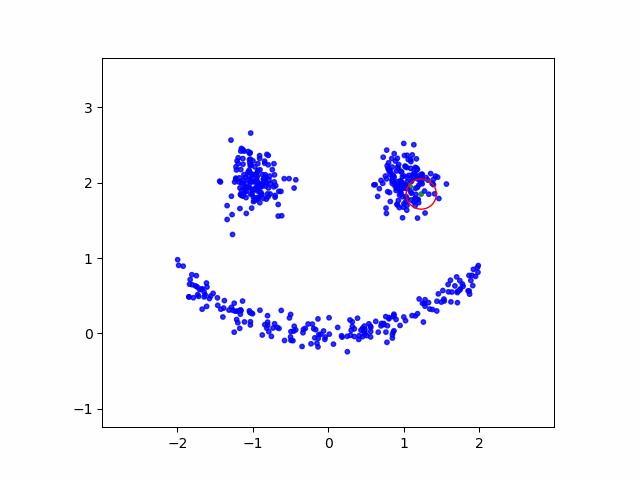

In [71]:
from IPython.display import Image
Image(filename="dbscan.gif", width=500, height=500)

Hints:

- First animate the dbscan algorithm for the dataset used in class (before trying to create the above dataset)
- Take a snapshot of the assignments when the point gets assigned to a cluster
- Confirm that the snapshot works by saving it to a file
- Don't forget to close the matplotlib plot after saving the figure
- Gather the snapshots in a list of images that you can then save as a gif using the code below
- Use `ax.set_aspect('equal')` so that the circles don't appear to be oval shaped
- To create the above dataset you need two blobs for the eyes. For the mouth you can use the following process to generate (x, y) pairs:
  - Pick an x at random in an interval that makes sense given where the eyes are positioned
  - For that x generate y that is 0.2 * x^2 plus a small amount of randomness
  - `zip` the x's and y's together and append them to the dataset containing the blobs

In [70]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from matplotlib.patches import Circle
TEMPFILE = 'temp.png'

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts 
        self.epsilon = epsilon
        self.snaps = []
        self.assignments=[0] * len(self.dataset) 


    def snapshot(self,point_idx):
        fig, ax = plt.subplots()
        colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
        ax.scatter(self.dataset[:, 0], self.dataset[:, 1], color=colors[self.assignments].tolist(), s=10, alpha=0.8)
        cir = Circle(self.dataset[point_idx], self.epsilon, color='r', fill=False)
        ax.add_patch(cir)
        ax.set_xlim(np.min(self.dataset[:,0]) - 1, np.max(self.dataset[:,0]) + 1)
        ax.set_ylim(np.min(self.dataset[:,1]) - 1, np.max(self.dataset[:,1]) + 1)
        ax.set_aspect('equal') 

        fig.savefig(TEMPFILE)
        plt.close()
        return im.fromarray(np.asarray(im.open(TEMPFILE)))


    def region_query(self, point):
        neighbors = []
        for i in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[i] - point) <= self.epsilon:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, point_idx, neighbors, cluster_id):
        self.assignments[point_idx] = cluster_id
        
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if self.assignments[neighbor_idx] == -1: 
                self.assignments[neighbor_idx] = cluster_id
                self.snaps.append(self.snapshot(neighbor_idx))
            elif self.assignments[neighbor_idx] == 0:
                self.assignments[neighbor_idx] = cluster_id
                self.snaps.append(self.snapshot(neighbor_idx))
                point_neighbors = self.region_query(self.dataset[neighbor_idx])
                if len(point_neighbors) >= self.min_pts:
                    neighbors = neighbors + point_neighbors
            i += 1

    def dbscan(self):
        cluster_id = 0
        
        for point_idx in range(len(self.dataset)): 
            if self.assignments[point_idx] != 0:
                continue  # Already classified
            neighbors = self.region_query(self.dataset[point_idx])
            if len(neighbors) < self.min_pts:
                self.assignments[point_idx] = -1  # Mark as noise
                self.snaps.append(self.snapshot(point_idx))
            else:
                cluster_id += 1  # Found a new cluster
                self.expand_cluster(point_idx, neighbors, cluster_id)
                
            

        return self.assignments


centers = [[-1,2],[1,2]]
eyes, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=.2)

mouth_x = 4 * np.random.random(200)-2
mouth_y = 0.2*mouth_x**2 + .1 * np.random.randn(mouth_x.size)

face = np.append(eyes, np.column_stack((mouth_x, mouth_y)), axis=0)

dbc = DBC(face, 3, .2)
clustering = dbc.dbscan()

dbc.snaps[0].save(
    'dbscan.gif',
    optimize=False,
    save_all=True,
    append_images=dbc.snaps[1:],
    loop=0,
    duration=25
)